Title: Popular Classification Algorithms

Logistic Regression


Task 1: Predict the likelihood of a student passing a test based on study hours.

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.73      0.89      0.80         9

    accuracy                           0.80        20
   macro avg       0.81      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


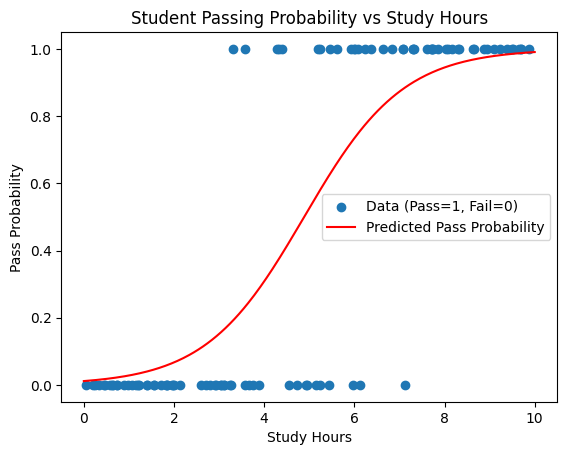

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Synthetic dataset
np.random.seed(42)
n_samples = 100
study_hours = np.random.uniform(0, 10, n_samples)

# Generate pass/fail labels (1=pass, 0=fail) with higher chance to pass if study_hours > 5
pass_prob = 1 / (1 + np.exp(- (study_hours - 5)))  # sigmoid centered at 5 hours
pass_label = np.random.binomial(1, pass_prob)

# Create DataFrame
df = pd.DataFrame({'study_hours': study_hours, 'pass': pass_label})

# Features and target
X = df[['study_hours']]
y = df['pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualization
import matplotlib.pyplot as plt

plt.scatter(X['study_hours'], y, label='Data (Pass=1, Fail=0)')
X_range = np.linspace(0, 10, 300).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)
pass_prob_pred = model.predict_proba(X_range_scaled)[:, 1]

plt.plot(X_range, pass_prob_pred, color='red', label='Predicted Pass Probability')
plt.xlabel('Study Hours')
plt.ylabel('Pass Probability')
plt.title('Student Passing Probability vs Study Hours')
plt.legend()
plt.show()


Task 2: Predict customer churn based on service usage data.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Generate synthetic dataset
np.random.seed(42)
n_samples = 500

# Features: monthly_usage (hours), num_services_used, customer_age (years)
monthly_usage = np.random.normal(loc=50, scale=15, size=n_samples)  # average usage hours
num_services_used = np.random.randint(1, 5, n_samples)  # number of services used (1 to 4)
customer_age = np.random.randint(18, 70, n_samples)  # age in years

# Churn label: Higher churn probability if low usage and fewer services used
churn_prob = 1 / (1 + np.exp(0.05 * monthly_usage - 1.5 * num_services_used + 0.02 * customer_age - 3))
churn_label = np.random.binomial(1, churn_prob)

# Create DataFrame
df = pd.DataFrame({
    'monthly_usage': monthly_usage,
    'num_services_used': num_services_used,
    'customer_age': customer_age,
    'churn': churn_label
})

# Features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.96      0.98      0.97        90

    accuracy                           0.94       100
   macro avg       0.85      0.79      0.82       100
weighted avg       0.94      0.94      0.94       100


Confusion Matrix:
 [[ 6  4]
 [ 2 88]]


Task 3: Classify if a review is positive or negative using NLP.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Sample synthetic dataset of reviews (you can replace with a real dataset)
data = {
    'review': [
        "I love this product, it works great!",
        "Horrible experience, would not recommend.",
        "Absolutely fantastic! Very happy with the purchase.",
        "Terrible quality, broke after one use.",
        "Excellent value for money.",
        "Waste of money, very disappointed.",
        "I am extremely satisfied with this.",
        "Not worth it at all, very bad.",
        "Works perfectly, I am pleased.",
        "I hate it, do not buy this."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1=positive, 0=negative
}

df = pd.DataFrame(data)

# Features and target
X = df['review']
y = df['sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression classifier
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
